## Advanced Regression Assignment


## 1. Load the data and understand the variables

Let's first have a look at the dataset and understand the size, attribute names etc.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import linear_model
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn import metrics
from sklearn.feature_selection import RFE,RFECV

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')


In [3]:
# reading the dataset
house = pd.read_csv(r"/content/sample_data/train.csv")


In [4]:
# head
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
#Null Count in dataset
for col in house.columns:
    print(f"{col}: {house[col].isnull().sum()}")

Id: 0
MSSubClass: 0
MSZoning: 0
LotFrontage: 259
LotArea: 0
Street: 0
Alley: 1369
LotShape: 0
LandContour: 0
Utilities: 0
LotConfig: 0
LandSlope: 0
Neighborhood: 0
Condition1: 0
Condition2: 0
BldgType: 0
HouseStyle: 0
OverallQual: 0
OverallCond: 0
YearBuilt: 0
YearRemodAdd: 0
RoofStyle: 0
RoofMatl: 0
Exterior1st: 0
Exterior2nd: 0
MasVnrType: 8
MasVnrArea: 8
ExterQual: 0
ExterCond: 0
Foundation: 0
BsmtQual: 37
BsmtCond: 37
BsmtExposure: 38
BsmtFinType1: 37
BsmtFinSF1: 0
BsmtFinType2: 38
BsmtFinSF2: 0
BsmtUnfSF: 0
TotalBsmtSF: 0
Heating: 0
HeatingQC: 0
CentralAir: 0
Electrical: 1
1stFlrSF: 0
2ndFlrSF: 0
LowQualFinSF: 0
GrLivArea: 0
BsmtFullBath: 0
BsmtHalfBath: 0
FullBath: 0
HalfBath: 0
BedroomAbvGr: 0
KitchenAbvGr: 0
KitchenQual: 0
TotRmsAbvGrd: 0
Functional: 0
Fireplaces: 0
FireplaceQu: 690
GarageType: 81
GarageYrBlt: 81
GarageFinish: 81
GarageCars: 0
GarageArea: 0
GarageQual: 81
GarageCond: 81
PavedDrive: 0
WoodDeckSF: 0
OpenPorchSF: 0
EnclosedPorch: 0
3SsnPorch: 0
ScreenPorch: 0
Pool

#### Data Exploration

In [6]:
house.shape

(1460, 81)

In [7]:
# summary of the dataset: 1460 rows, 81 columns
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
house.describe()      #other atributes of the dataframe

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
# all numeric (float and int) variables in the dataset
house_numeric = house.select_dtypes(include=['float64', 'int64'])
house_numeric.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


Target variable 'sale Price' vs a few select columns

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text major ticklabel objects>)

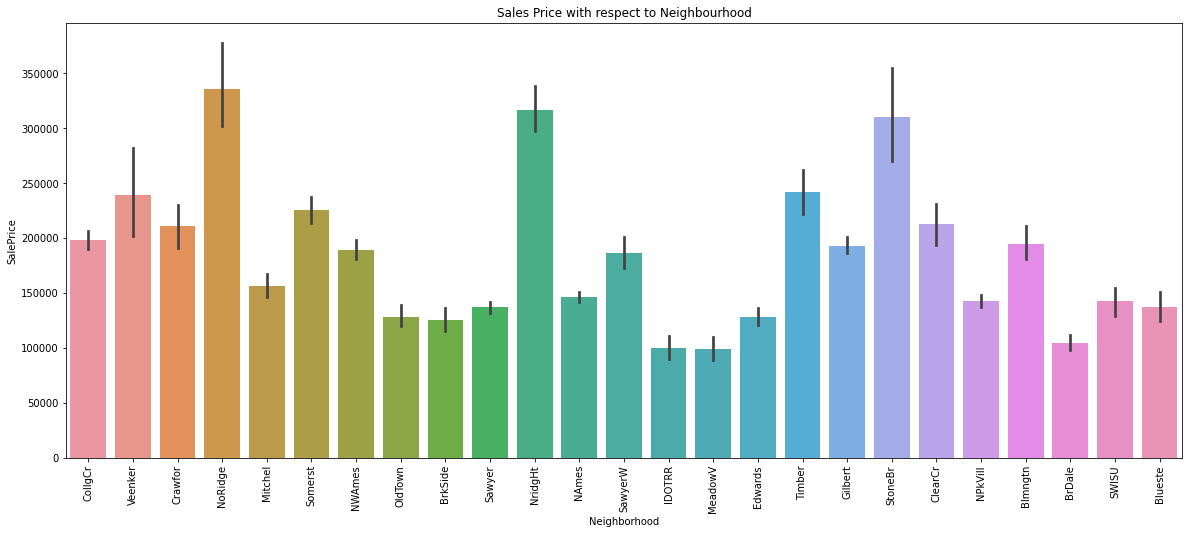

In [10]:
# plot 'Sale Price' with respect to 'Neighborhood'

plt.figure(figsize=(20, 8))
sns.barplot(x="Neighborhood", y="SalePrice", data= house)
plt.title("Sales Price with respect to Neighbourhood")
plt.xticks(rotation=90)

 Properties in some of the Neighborhoods are high priced.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

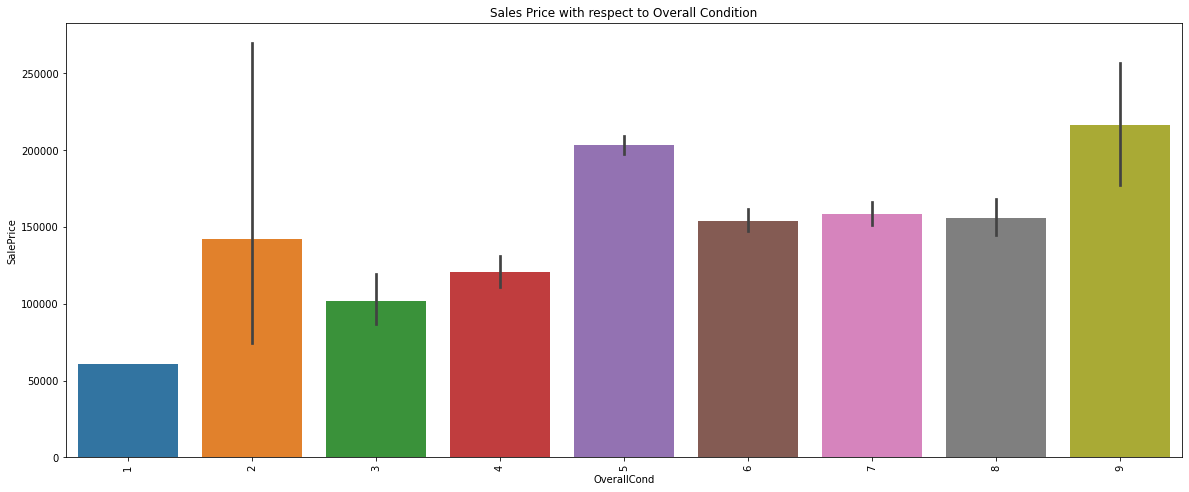

In [11]:
# plot 'overall condition' with respect to 'Saleprice'

plt.figure(figsize=(20, 8))
sns.barplot(x="OverallCond", y="SalePrice", data= house)
plt.title("Sales Price with respect to Overall Condition")
plt.xticks(rotation=90)

Properties in some of the Neighborhoods are high priced.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

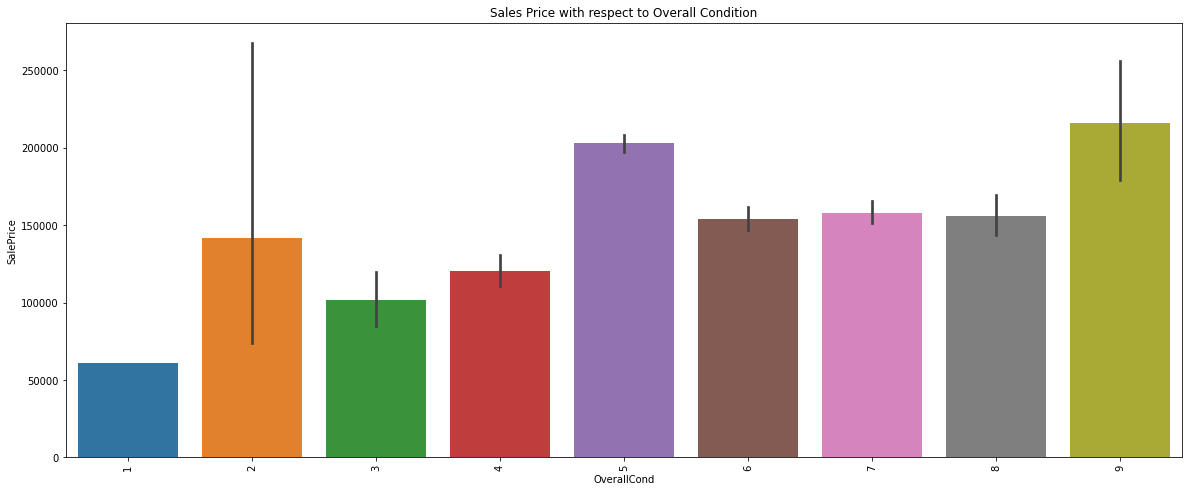

In [12]:
# plot 'overall condition' with respect to 'Saleprice'

plt.figure(figsize=(20, 8))
sns.barplot(x="OverallCond", y="SalePrice", data= house)
plt.title("Sales Price with respect to Overall Condition")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

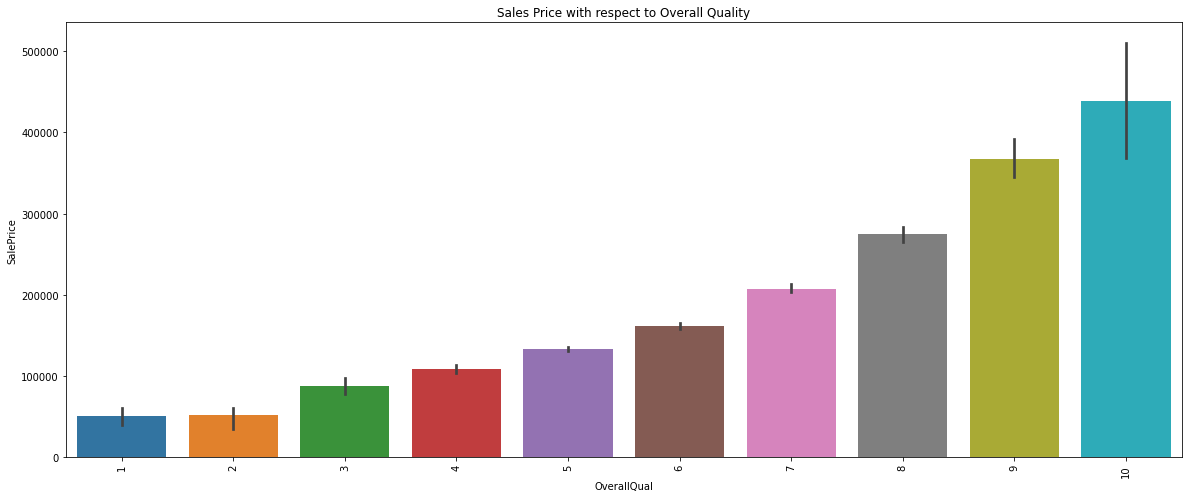

In [13]:
# plot 'overall quality' with respect to 'Saleprice'

plt.figure(figsize=(20, 8))
sns.barplot(x="OverallQual", y="SalePrice", data= house)
plt.title("Sales Price with respect to Overall Quality")
plt.xticks(rotation=90)

In [14]:
house_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1452 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

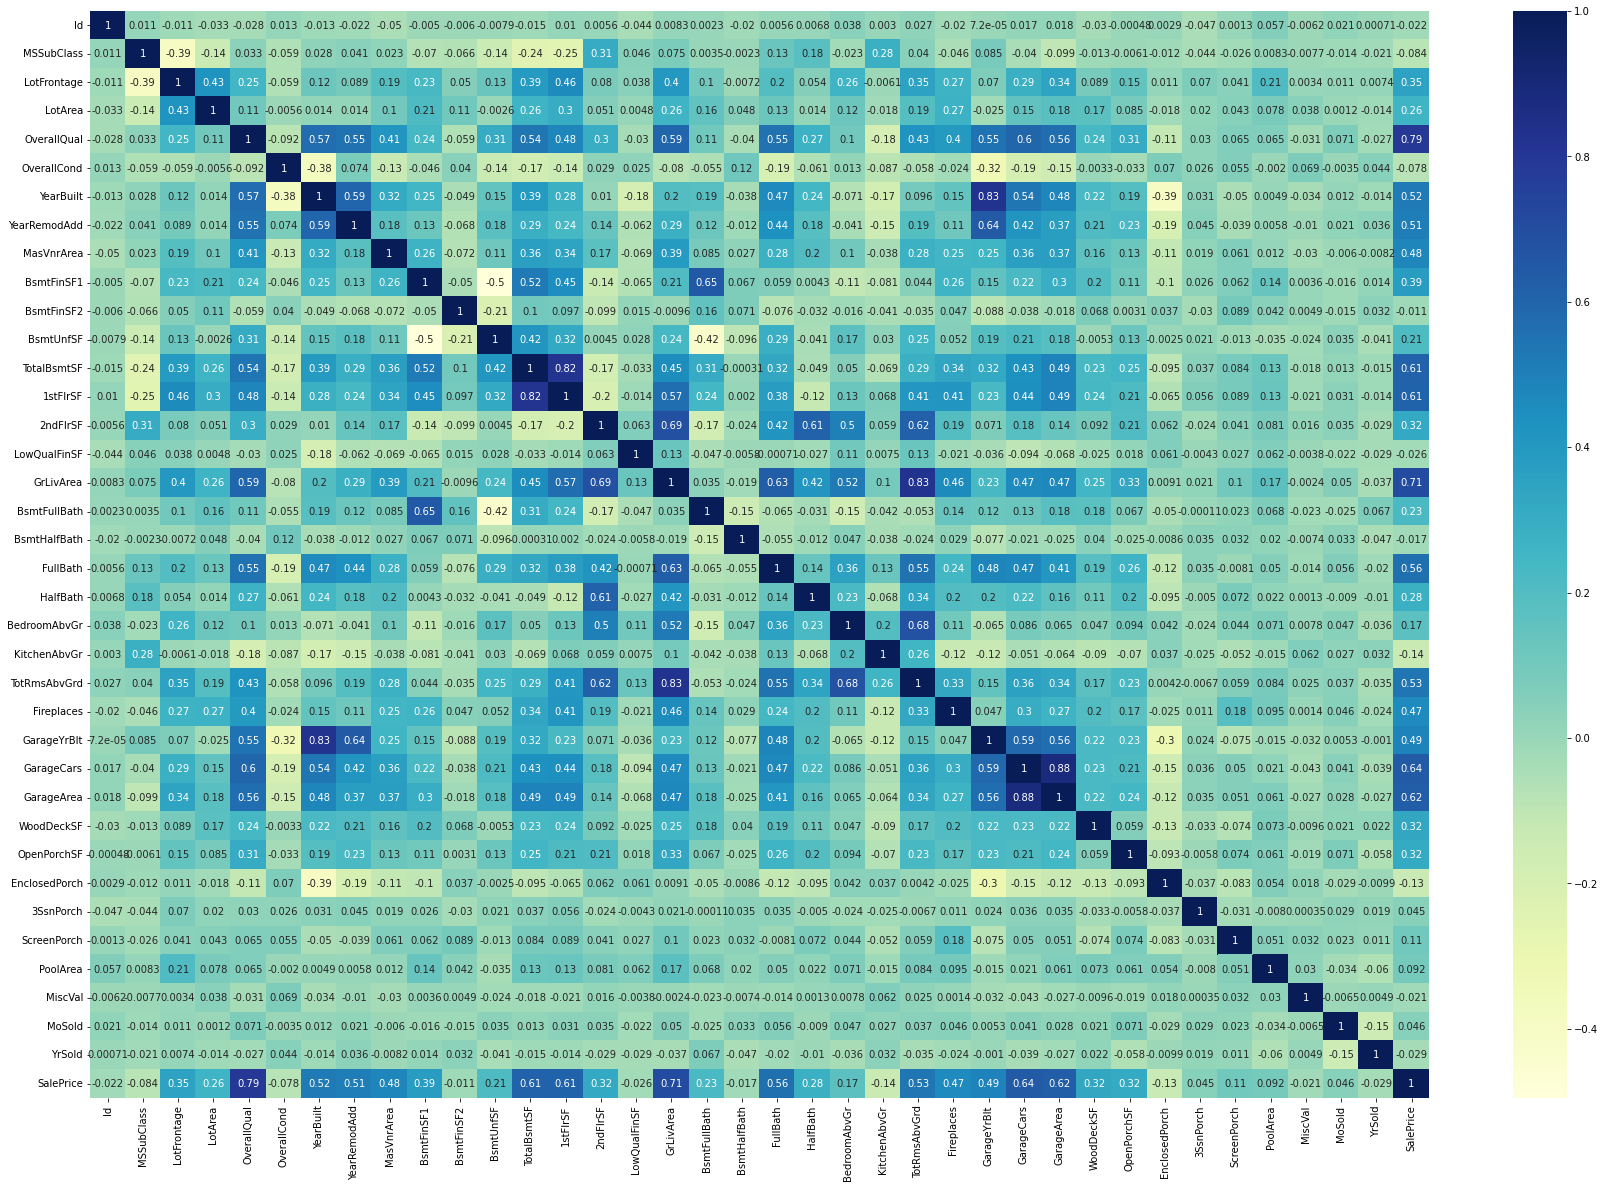

In [15]:
# correlation matrix
cor = house_numeric.corr()
cor

# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(30,20))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

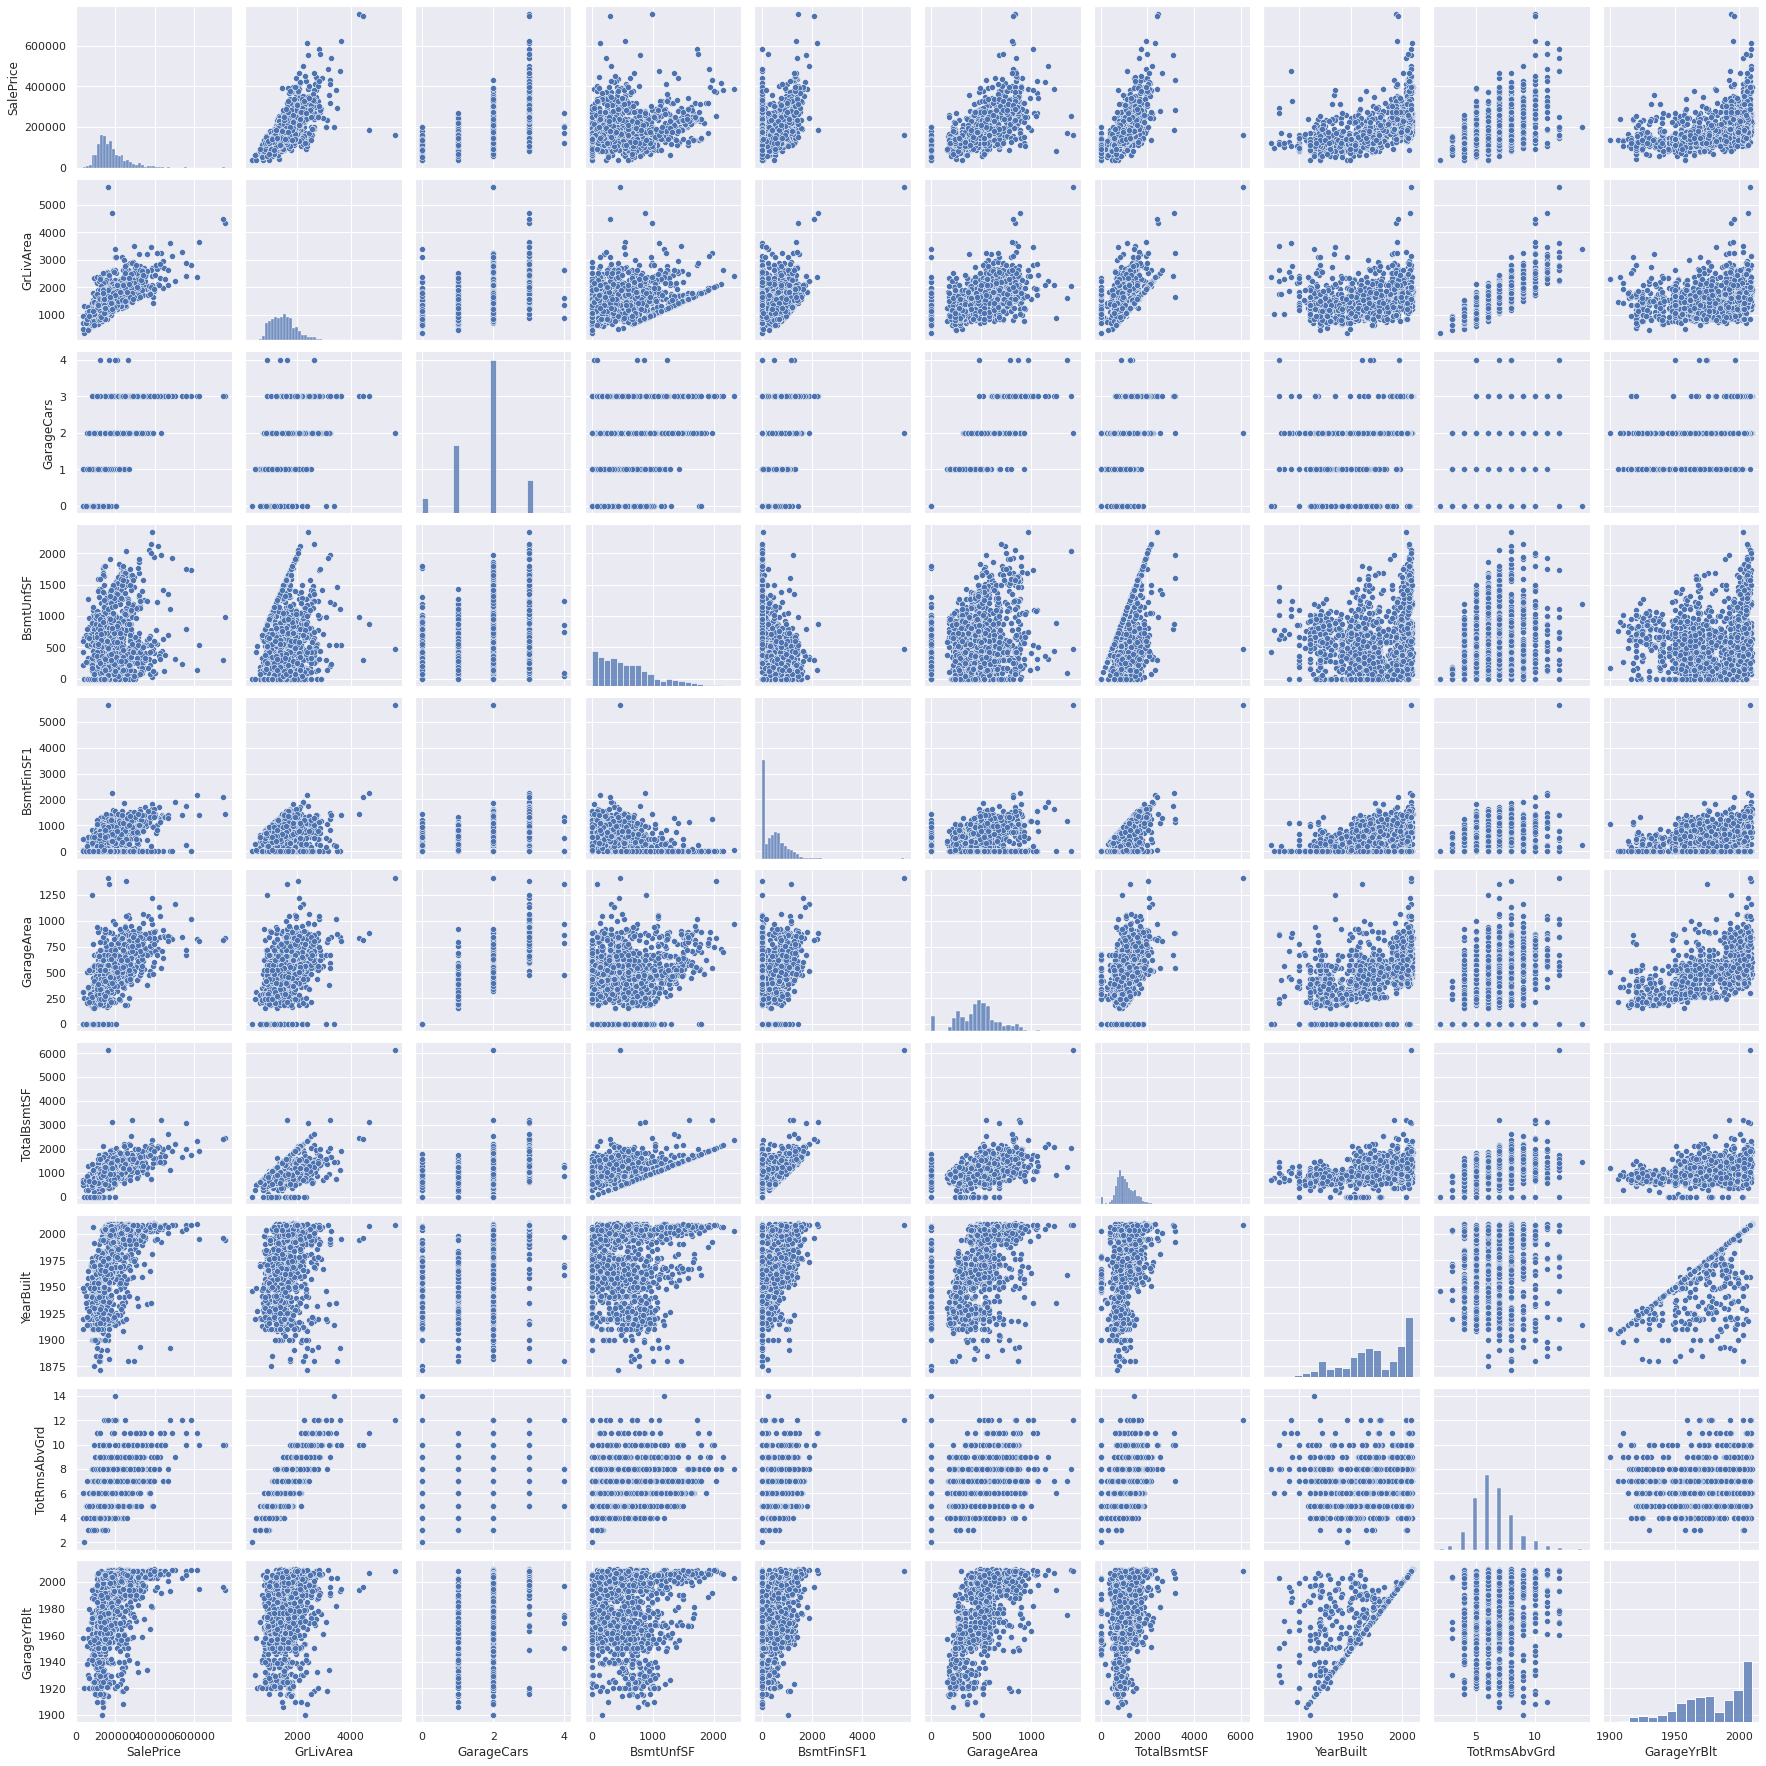

In [16]:
# Checking the same with a pairplot 
sns.set()
cols = ['SalePrice', 'GrLivArea', 'GarageCars', 'BsmtUnfSF', 'BsmtFinSF1', 'GarageArea', 'TotalBsmtSF', 'YearBuilt', 'TotRmsAbvGrd', 'GarageYrBlt']
sns.pairplot(house[cols], size = 2.5)
plt.show()

Here, although some variables are numeric (int), we'd rather treat them as categorical since they have discrete values.

In [17]:
# dropping the columns we want to treat as categorical variables
house_numeric = house_numeric.drop(['MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 
                                    'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 
                                   'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 
                                   'MoSold', 'YrSold'], axis=1)
house_numeric.head()

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,1,65.0,8450,196.0,706,0,150,856,856,854,...,1710,548,0,61,0,0,0,0,0,208500
1,2,80.0,9600,0.0,978,0,284,1262,1262,0,...,1262,460,298,0,0,0,0,0,0,181500
2,3,68.0,11250,162.0,486,0,434,920,920,866,...,1786,608,0,42,0,0,0,0,0,223500
3,4,60.0,9550,0.0,216,0,540,756,961,756,...,1717,642,0,35,272,0,0,0,0,140000
4,5,84.0,14260,350.0,655,0,490,1145,1145,1053,...,2198,836,192,84,0,0,0,0,0,250000


### Outlier Treatment

In [18]:
house_numeric.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
count,1460.000000,1201.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,70.049958,10516.828082,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,...,1515.463699,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,180921.195890
std,421.610009,24.284752,9981.264932,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,...,525.480383,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,79442.502883
min,1.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,...,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,365.750000,59.000000,7553.500000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,...,1129.500000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000
50%,730.500000,69.000000,9478.500000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,...,1464.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000
75%,1095.250000,80.000000,11601.500000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,...,1776.750000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000
90%,1314.100000,96.000000,14381.700000,335.000000,1065.500000,117.200000,1232.000000,1602.200000,1680.000000,954.200000,...,2158.300000,757.100000,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,278000.000000
95%,1387.050000,107.000000,17401.150000,456.000000,1274.000000,396.200000,1468.000000,1753.000000,1831.250000,1141.050000,...,2466.100000,850.100000,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,326100.000000
99%,1445.410000,141.000000,37567.640000,791.920000,1572.410000,830.380000,1797.050000,2155.050000,2219.460000,1418.920000,...,3123.480000,1002.790000,505.460000,285.820000,261.050000,168.000000,268.050000,0.000000,700.000000,442567.010000


##### Outlier analysis

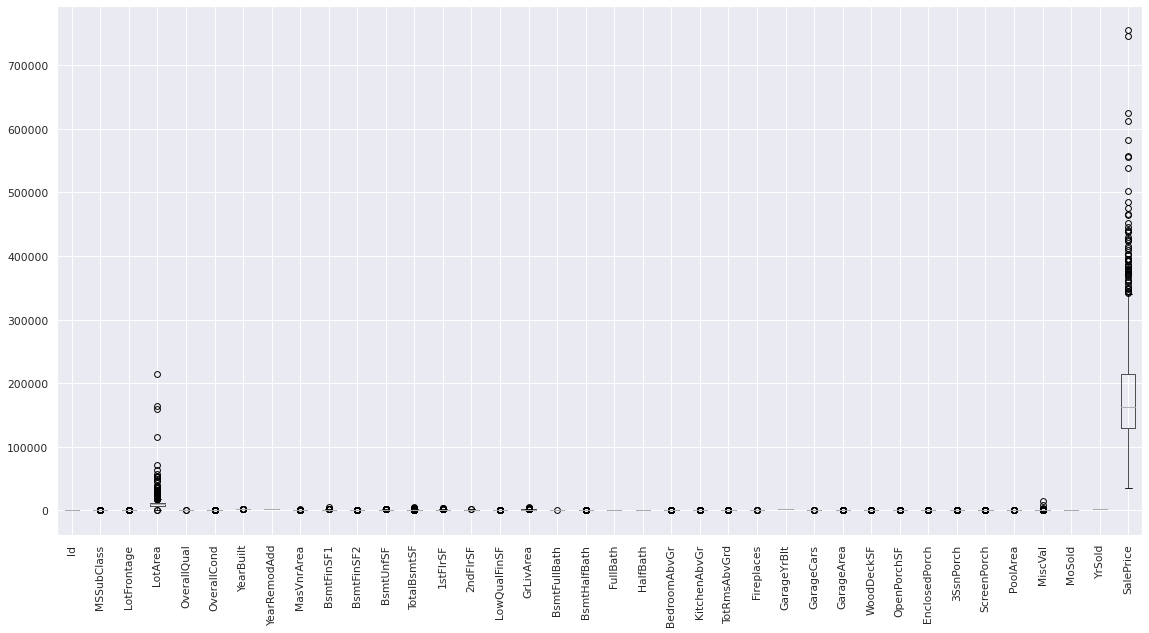

In [19]:
plt.figure(figsize=(20,10), dpi=70)
house.boxplot()
plt.xticks(rotation=90)
plt.show()

(1453, 81)

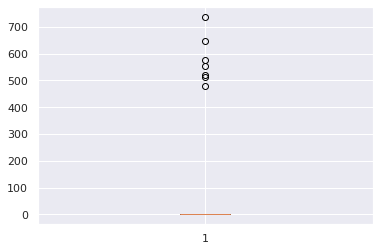

In [20]:
# outlier treatment
plt.boxplot(house['PoolArea'])
Q1 = house['PoolArea'].quantile(0.1)
Q3 = house['PoolArea'].quantile(0.9)
IQR = Q3 - Q1
house = house[(house['PoolArea'] >= Q1 - 1.5*IQR) & 
                      (house['PoolArea'] <= Q3 + 1.5*IQR)]
house.shape

(1402, 81)

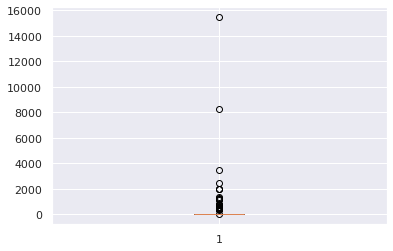

In [21]:
# outlier treatment
plt.boxplot(house['MiscVal'])
Q1 = house['MiscVal'].quantile(0.1)
Q3 = house['MiscVal'].quantile(0.9)
IQR = Q3 - Q1
house = house[(house['MiscVal'] >= Q1 - 1.5*IQR) & 
                      (house['MiscVal'] <= Q3 + 1.5*IQR)]
house.shape

(1291, 81)

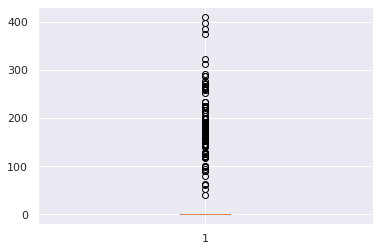

In [22]:
# outlier treatment
plt.boxplot(house['ScreenPorch'])
Q1 = house['ScreenPorch'].quantile(0.1)
Q3 = house['ScreenPorch'].quantile(0.9)
IQR = Q3 - Q1
house = house[(house['ScreenPorch'] >= Q1 - 1.5*IQR) & 
                      (house['ScreenPorch'] <= Q3 + 1.5*IQR)]
house.shape

(1274, 81)

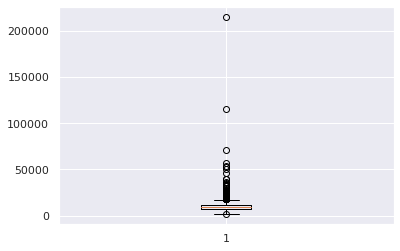

In [23]:
# outlier treatment
plt.boxplot(house['LotArea'])
Q1 = house['LotArea'].quantile(0.1)
Q3 = house['LotArea'].quantile(0.9)
IQR = Q3 - Q1
house = house[(house['LotArea'] >= Q1 - 1.5*IQR) & 
                      (house['LotArea'] <= Q3 + 1.5*IQR)]
house.shape

(1255, 81)

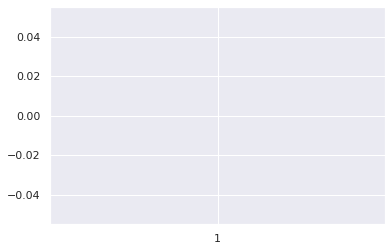

In [24]:
# outlier treatment
plt.boxplot(house['MasVnrArea'])
Q1 = house['MasVnrArea'].quantile(0.1)
Q3 = house['MasVnrArea'].quantile(0.9)
IQR = Q3 - Q1
house = house[(house['MasVnrArea'] >= Q1 - 1.5*IQR) & 
                      (house['MasVnrArea'] <= Q3 + 1.5*IQR)]
house.shape

(1253, 81)

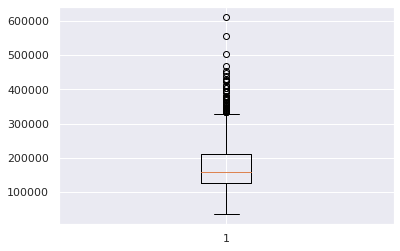

In [25]:
# outlier treatment
plt.boxplot(house['SalePrice'])
Q1 = house['SalePrice'].quantile(0.1)
Q3 = house['SalePrice'].quantile(0.9)
IQR = Q3 - Q1
house = house[(house['SalePrice'] >= Q1 - 1.5*IQR) & 
                      (house['SalePrice'] <= Q3 + 1.5*IQR)]
house.shape

## Checking the Correlation between the variables

In [26]:
# correlation matrix
cor = house_numeric.corr()
cor

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
Id,1.000000,-0.010601,-0.033226,-0.050298,-0.005024,-0.005968,-0.007940,-0.015415,0.010496,0.005590,...,0.008273,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,-0.021917
LotFrontage,-0.010601,1.000000,0.426095,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,...,0.402797,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.351799
LotArea,-0.033226,0.426095,1.000000,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,...,0.263116,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.263843
MasVnrArea,-0.050298,0.193458,0.104160,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,...,0.390857,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,0.477493
BsmtFinSF1,-0.005024,0.233633,0.214103,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,...,0.208171,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,0.386420
BsmtFinSF2,-0.005968,0.049900,0.111170,-0.072319,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,...,-0.009640,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.011378
BsmtUnfSF,-0.007940,0.132644,-0.002618,0.114442,-0.495251,-0.209294,1.000000,0.415360,0.317987,0.004469,...,0.240257,0.183303,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.214479
TotalBsmtSF,-0.015415,0.392075,0.260833,0.363936,0.522396,0.104810,0.415360,1.000000,0.819530,-0.174512,...,0.454868,0.486665,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.613581
1stFlrSF,0.010496,0.457181,0.299475,0.344501,0.445863,0.097117,0.317987,0.819530,1.000000,-0.202646,...,0.566024,0.489782,0.235459,0.211671,-0.065292,0.056104,0.088758,0.131525,-0.021096,0.605852
2ndFlrSF,0.005590,0.080177,0.050986,0.174561,-0.137079,-0.099260,0.004469,-0.174512,-0.202646,1.000000,...,0.687501,0.138347,0.092165,0.208026,0.061989,-0.024358,0.040606,0.081487,0.016197,0.319334


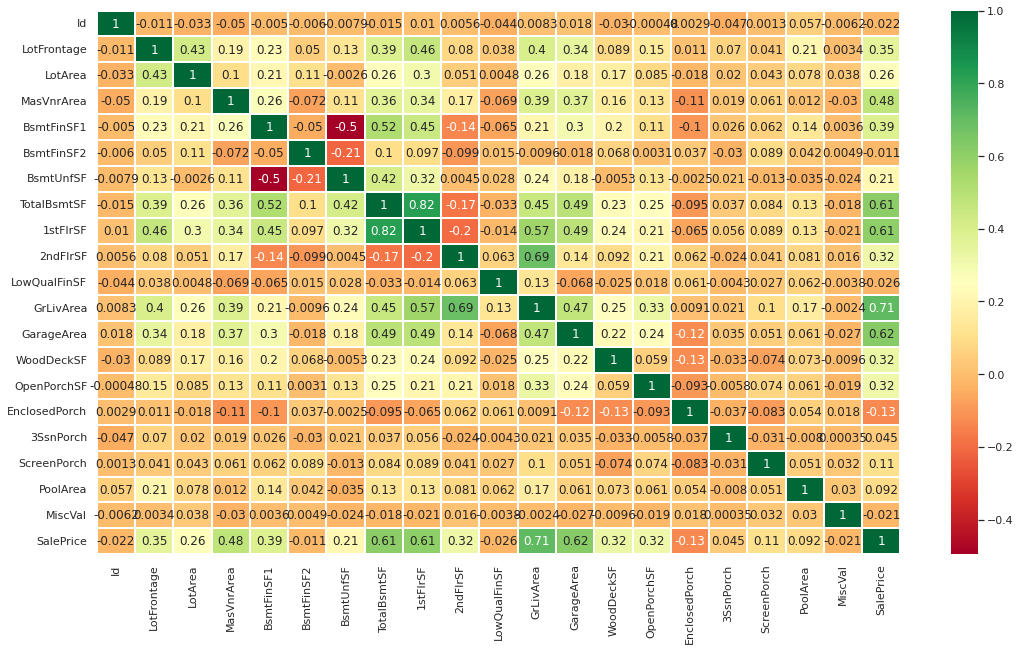

In [27]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(18,10))

# heatmap
sns.heatmap(cor, annot=True,cmap="RdYlGn",linewidth =1)
plt.show()


## 2. Data Inspection
Data cleaning steps. 

we have some missing values in the dataset. We also have variables with distinct values, which are categorical variables

In [28]:
# variable formats
house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1253 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1253 non-null   int64  
 1   MSSubClass     1253 non-null   int64  
 2   MSZoning       1253 non-null   object 
 3   LotFrontage    1040 non-null   float64
 4   LotArea        1253 non-null   int64  
 5   Street         1253 non-null   object 
 6   Alley          82 non-null     object 
 7   LotShape       1253 non-null   object 
 8   LandContour    1253 non-null   object 
 9   Utilities      1253 non-null   object 
 10  LotConfig      1253 non-null   object 
 11  LandSlope      1253 non-null   object 
 12  Neighborhood   1253 non-null   object 
 13  Condition1     1253 non-null   object 
 14  Condition2     1253 non-null   object 
 15  BldgType       1253 non-null   object 
 16  HouseStyle     1253 non-null   object 
 17  OverallQual    1253 non-null   int64  
 18  OverallC

In [29]:
house.isnull().sum()  #checking the number of null values in the dataset

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      213
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [30]:
# Checking the percentage of missing values
round(100*(house.isnull().sum()/len(house.index)), 2)

Id                0.0
MSSubClass        0.0
MSZoning          0.0
LotFrontage      17.0
LotArea           0.0
                 ... 
MoSold            0.0
YrSold            0.0
SaleType          0.0
SaleCondition     0.0
SalePrice         0.0
Length: 81, dtype: float64

## Null value treatment
Based on the domain understanding and the data dictionary provided with the data,we will impute the null values.

In [31]:
house.shape

(1253, 81)

In [32]:
#NA in Alley column means No Alley, so we will replace NA by it.
house['Alley'].fillna('No Alley', inplace=True)

In [33]:
house['MasVnrType'].fillna('None', inplace=True) 

In [34]:
#NA in FireplaceQu column means No Fireplace, so we will replace NA by it.
house['FireplaceQu'].fillna('No Fireplace', inplace=True)

In [35]:
#NA in PoolQC column means No Pool, so we will replace NA by it.
house['PoolQC'].fillna('No Pool', inplace=True) 

In [36]:
#NA in Fence column means No Fence, so we will replace NA by it.
house['Fence'].fillna('No Fence', inplace=True) 

In [37]:
house['MasVnrArea'].fillna(0, inplace=True) 

In [38]:
house['LotFrontage'].fillna(0, inplace=True) 

In [39]:
#NA in GarageType, GarageFinish, GarageQual, GarageCond columns mean No Garage, so we will replace NA by it.

house['GarageType'].fillna('No Garage', inplace=True) 
house['GarageFinish'].fillna('No Garage', inplace=True) 
house['GarageQual'].fillna('No Garage', inplace=True) 
house['GarageCond'].fillna('No Garage', inplace=True) 

In [40]:
# MiscFeature column has almost 99% null values so we will drop it
house= house.drop('MiscFeature', axis=1)

In [41]:
#Droping id
house= house.drop('Id', axis=1)

In [42]:
house.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 79, dtype: int64

In [43]:
# derive a column for 'Age of the property' when it was sold: Name it as 'PropAge'
# PropAge -  Property Age from yearsold - yearbuilt
house['PropAge'] = (house['YrSold'] - house['YearBuilt'])
house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,PropAge
0,60,RL,65.0,8450,Pave,No Alley,Reg,Lvl,AllPub,Inside,...,0,No Pool,No Fence,0,2,2008,WD,Normal,208500,5
1,20,RL,80.0,9600,Pave,No Alley,Reg,Lvl,AllPub,FR2,...,0,No Pool,No Fence,0,5,2007,WD,Normal,181500,31
2,60,RL,68.0,11250,Pave,No Alley,IR1,Lvl,AllPub,Inside,...,0,No Pool,No Fence,0,9,2008,WD,Normal,223500,7
3,70,RL,60.0,9550,Pave,No Alley,IR1,Lvl,AllPub,Corner,...,0,No Pool,No Fence,0,2,2006,WD,Abnorml,140000,91
4,60,RL,84.0,14260,Pave,No Alley,IR1,Lvl,AllPub,FR2,...,0,No Pool,No Fence,0,12,2008,WD,Normal,250000,8


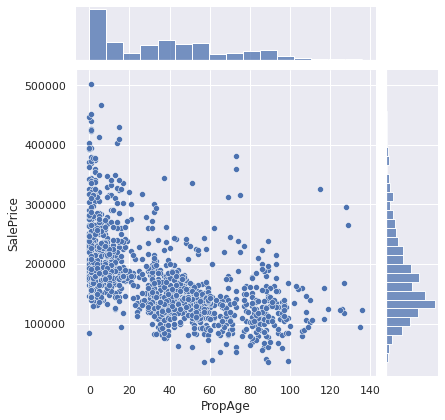

In [44]:
# PropAge vs SalePrice
sns.jointplot(x = house['PropAge'], y = house['SalePrice'])
plt.show()

Increase in Property Age shows a decreas in saleprice  i.e newer the property, high is the saleprice


In [45]:
# we can drop the column Month sold and Year Sold, Year built and Year remodelled since it will not be required further
house = house.drop(['MoSold'], axis = 1)
house = house.drop(['YrSold'], axis = 1)
house = house.drop(['YearBuilt'], axis = 1)
house = house.drop(['YearRemodAdd'], axis = 1)
house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,SaleType,SaleCondition,SalePrice,PropAge
0,60,RL,65.0,8450,Pave,No Alley,Reg,Lvl,AllPub,Inside,...,0,0,0,No Pool,No Fence,0,WD,Normal,208500,5
1,20,RL,80.0,9600,Pave,No Alley,Reg,Lvl,AllPub,FR2,...,0,0,0,No Pool,No Fence,0,WD,Normal,181500,31
2,60,RL,68.0,11250,Pave,No Alley,IR1,Lvl,AllPub,Inside,...,0,0,0,No Pool,No Fence,0,WD,Normal,223500,7
3,70,RL,60.0,9550,Pave,No Alley,IR1,Lvl,AllPub,Corner,...,0,0,0,No Pool,No Fence,0,WD,Abnorml,140000,91
4,60,RL,84.0,14260,Pave,No Alley,IR1,Lvl,AllPub,FR2,...,0,0,0,No Pool,No Fence,0,WD,Normal,250000,8


In [46]:
house.Utilities.value_counts()

AllPub    1253
Name: Utilities, dtype: int64

In [47]:
house.Street.value_counts()

Pave    1251
Grvl       2
Name: Street, dtype: int64

In [48]:
# We can also drop columns that show very low variance and thus not required for predictions
house = house.drop(['Street'], axis = 1)
house = house.drop(['Utilities'], axis = 1)

In [49]:
#converting from int type to object to treat the variables as categorical variables
house['MSSubClass'] = house['MSSubClass'].astype('object')
house['OverallQual'] = house['OverallQual'].astype('object')
house['OverallCond'] = house['OverallCond'].astype('object')
house['BsmtFullBath'] = house['BsmtFullBath'].astype('object')
house['BsmtHalfBath'] = house['BsmtHalfBath'].astype('object')
house['FullBath'] = house['FullBath'].astype('object')
house['HalfBath'] = house['HalfBath'].astype('object')
house['BedroomAbvGr'] = house['BedroomAbvGr'].astype('object')
house['KitchenAbvGr'] = house['KitchenAbvGr'].astype('object')
house['TotRmsAbvGrd'] = house['TotRmsAbvGrd'].astype('object')
house['Fireplaces'] = house['Fireplaces'].astype('object')
house['GarageCars'] = house['GarageCars'].astype('object')

In [50]:
house.shape

(1253, 74)

In [51]:
final = house

## Dummy Variables

In [52]:
# List of variables to map

varlist3 =  ['CentralAir']

# Defining the map function
def binary_map(x):
    return x.map({'Y': 1, "N": 0})

# Applying the function to the Lead list
final[varlist3] = final[varlist3].apply(binary_map)

## 3. Data Preparation 


Prepare the data and build the model.

In [53]:
# split into X and y
X = final


In [54]:
# creating dummy variables for categorical variables

# subset all categorical variables
house_categorical = X.select_dtypes(include=['object'])
house_categorical.head()


,MSSubClass,MSZoning,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,SaleType,SaleCondition
0,60,RL,No Alley,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,...,Attchd,RFn,2,TA,TA,Y,No Pool,No Fence,WD,Normal
1,20,RL,No Alley,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,...,Attchd,RFn,2,TA,TA,Y,No Pool,No Fence,WD,Normal
2,60,RL,No Alley,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,...,Attchd,RFn,2,TA,TA,Y,No Pool,No Fence,WD,Normal
3,70,RL,No Alley,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,...,Detchd,Unf,3,TA,TA,Y,No Pool,No Fence,WD,Abnorml
4,60,RL,No Alley,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,...,Attchd,RFn,3,TA,TA,Y,No Pool,No Fence,WD,Normal


In [55]:
# convert into dummies
house_dummies = pd.get_dummies(house_categorical, drop_first=True)
house_dummies.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [56]:
# drop categorical variables 
final = final.drop(list(house_categorical.columns), axis=1)

In [57]:
# concat dummy variables with X
final = pd.concat([final, house_dummies], axis=1)

In [58]:
final.shape

(1253, 294)

## 4. Splitting the data into Train & Test Dataset

In [59]:
# split into train and test
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(final,train_size=0.8,
                                                    test_size = 0.2, random_state=42)

## scaling the features

In [60]:
# scaling the features

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(df_train)
scaler.transform(df_test)

array([[-1.7207616 ,  0.67910024,  0.16752795, ..., -0.12738595,
         0.47111699, -0.30640898],
       [-1.7207616 ,  4.41518373,  0.66206822, ..., -0.12738595,
         0.47111699, -0.30640898],
       [ 0.0671199 , -0.62282392, -0.60101436, ..., -0.12738595,
         0.47111699, -0.30640898],
       ...,
       [ 0.48429225,  0.01869622, -0.11984004, ..., -0.12738595,
        -2.12261502,  3.26361192],
       [-1.7207616 ,  0.70835696,  0.44821297, ..., -0.12738595,
         0.47111699, -0.30640898],
       [ 0.75247448,  0.16418192,  2.4063251 , ..., -0.12738595,
        -2.12261502,  3.26361192]])

In [61]:
y_train = df_train.SalePrice
y_train = np.log(df_train.SalePrice)
X_train = df_train.drop("SalePrice",1) # take out the target variable

y_test = df_test.SalePrice
y_test = np.log(df_test.SalePrice)
X_test = df_test.drop("SalePrice",1) # take out the target variable

X_train = X_train.fillna(X_train.interpolate())
X_test = X_test.fillna(X_test.interpolate())

## 5. Model Building and Evaluation

## LR, Ridge and Lasso Regression

Predicting the prices using simple linear regression, to perform ridge and lasso regression.

In [62]:
# Running Linear regression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [63]:
#lets predict the R-squared value of test and train data
y_train_preds_lm = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_preds_lm))

0.9529318786065605


In [64]:
print(lm.intercept_)
print(lm.coef_)

9.426858874403404
[ 1.30587370e-05  6.49606365e-06  1.56427365e-06  5.34339937e-05
  5.81893381e-05 -1.22961676e-05  9.93271588e-05  1.87510233e-02
  8.17170310e-05  8.52072750e-05  2.03927870e-05  1.87317098e-04
  2.17364784e-04  6.32178191e-05  8.64364877e-05  8.65300737e-05
  1.98105854e-04  1.90645007e-04 -1.75207071e-14  6.65439925e-15
 -8.30238656e-15 -2.70190021e-03 -5.13373193e-02  1.95993293e-02
  1.24127894e-01  5.30640867e-03 -3.65632600e-02 -1.11394970e-02
 -7.48190860e-02 -7.43129917e-02 -1.90062610e-02 -4.09580829e-02
 -6.67841669e-02 -1.73072806e-01 -1.13740559e-01  6.44985996e-02
  4.68452659e-01  4.02991126e-01  4.14636839e-01  3.86442621e-01
 -4.05418087e-02 -7.78382740e-03  1.00316688e-03  2.69243080e-02
  9.06641016e-03  2.83995640e-02 -2.86640641e-02  2.44924887e-02
  2.75577785e-02 -4.12490350e-02 -5.52811625e-02 -2.34905469e-02
  6.04766122e-02 -8.24478027e-02  2.65158178e-02  1.17347148e-02
 -3.42289399e-03  2.80974759e-02 -3.37955773e-02  1.35736045e-01
 -6.984

In [65]:
#Linear regression test pred
y_pred_lr = lm.predict(X_test)

In [66]:
# linear Regression R^2
metrics.r2_score(y_test, y_pred_lr)

0.8848988123131399

## Linear Regression with RFE

In [67]:
# Running RFE 
# Since there are more than 200 + variables for analysis, we will run RFE to select some that have high predictive power


lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm)             
rfe = rfe.fit(X_train, y_train)           # running RFE

In [68]:
# Check the ranks
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 138),
 ('LotArea', False, 140),
 ('MasVnrArea', False, 141),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('CentralAir', False, 16),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('GarageYrBlt', False, 139),
 ('GarageArea', False, 136),
 ('WoodDeckSF', False, 135),
 ('OpenPorchSF', False, 134),
 ('EnclosedPorch', False, 130),
 ('3SsnPorch', False, 133),
 ('ScreenPorch', False, 144),
 ('PoolArea', False, 143),
 ('MiscVal', False, 142),
 ('PropAge', False, 123),
 ('MSSubClass_30', True, 1),
 ('MSSubClass_40', False, 55),
 ('MSSubClass_45', False, 20),
 ('MSSubClass_50', False, 40),
 ('MSSubClass_60', False, 83),
 ('MSSubClass_70', False, 39),
 ('MSSubClass_75', True, 1),
 ('MSSubClass_80', True, 1),
 ('MSSubClass_85', False, 99),
 ('MSSubClass_90', True, 1),
 ('MSSubClass_120', True, 1),
 ('MSSubClass_160', True, 1),
 ('MSSubClass_180', True, 1),
 ('

In [69]:
# Select the top 100 variables

col_rfe = X_train.columns[rfe.support_]
col_rfe

Index(['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'MSSubClass_30',
       'MSSubClass_75',
       ...
       'GarageCond_Po', 'GarageCond_TA', 'PavedDrive_P', 'Fence_GdWo',
       'Fence_MnWw', 'SaleType_CWD', 'SaleType_Oth', 'SaleCondition_AdjLand',
       'SaleCondition_Normal', 'SaleCondition_Partial'],
      dtype='object', length=146)

In [70]:
#RFE
y_pred_rfe = rfe.predict(X_train)

In [71]:
# RFE R^2
metrics.r2_score(y_train, y_pred_rfe)

0.9348989429816394

In [72]:
#Using RFE predicting the test r2
y_pred_rfe_test = rfe.predict(X_test)
metrics.r2_score(y_test, y_pred_rfe_test)


-48628329318.728264

##### Linear regression with RFE didnt fit the Test data well, Hence moving with ridge and lasso 

## Ridge Regression with RFECV

In [73]:
#Running RFECV
rfecv = RFECV(
    estimator=Ridge(),
    min_features_to_select=30,
    step=5,
    n_jobs=-1,
    scoring="r2",
    cv=5,
)

rfe_cv = rfecv.fit(X_train, y_train)

In [74]:
#RFECV
y_pred_rfe_cv = rfe_cv.predict(X_train)

In [75]:
# RFECV R^2
metrics.r2_score(y_train, y_pred_rfe_cv)

0.9477381393474215

In [76]:
#Columns used in RFECV
col = X_train.columns[rfe_cv.support_]
len(col)

283

In [77]:
rfecv.support_

array([ True, False, False,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
       False, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [78]:
col = X_train.columns[rfecv.support_]
col

Index(['LotFrontage', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'CentralAir', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageYrBlt',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=283)

In [79]:
len(col)

283

## Ridge Regression

In [80]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [81]:
#checking the value of optimum number of parameters
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 9.0}
-0.08131171336815356


In [82]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1000]
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.015425,0.000764,0.006223,0.000166,0.0001,{'alpha': 0.0001},-0.092520,-0.113528,-0.099201,-0.093248,...,-0.098809,0.007719,26,-0.055210,-0.053911,-0.053569,-0.055318,-0.056823,-0.054966,0.001157
1,0.017045,0.002593,0.007174,0.002126,0.001,{'alpha': 0.001},-0.092501,-0.113391,-0.099151,-0.093197,...,-0.098716,0.007694,25,-0.055217,-0.053916,-0.053578,-0.055331,-0.056841,-0.054977,0.001161
2,0.014857,0.000217,0.006294,0.000340,0.01,{'alpha': 0.01},-0.092317,-0.112378,-0.098829,-0.092691,...,-0.097974,0.007573,24,-0.055279,-0.053974,-0.053675,-0.055467,-0.057012,-0.055082,0.001193
3,0.015301,0.000861,0.006247,0.000196,0.05,{'alpha': 0.05},-0.091660,-0.109526,-0.097357,-0.090836,...,-0.095917,0.007264,23,-0.055474,-0.054302,-0.054068,-0.055913,-0.057584,-0.055468,0.001265
4,0.014830,0.000140,0.006151,0.000059,0.1,{'alpha': 0.1},-0.091183,-0.107326,-0.095694,-0.089106,...,-0.094290,0.007018,22,-0.055656,-0.054635,-0.054514,-0.056319,-0.058125,-0.055850,0.001319
5,0.017922,0.006028,0.008332,0.002817,0.2,{'alpha': 0.2},-0.090441,-0.104362,-0.094083,-0.086836,...,-0.092299,0.006702,21,-0.055941,-0.055109,-0.055293,-0.056949,-0.058898,-0.056438,0.001388
6,0.016118,0.001590,0.006485,0.000310,0.3,{'alpha': 0.3},-0.089777,-0.102310,-0.092980,-0.085792,...,-0.090997,0.006445,19,-0.056136,-0.055480,-0.055906,-0.057403,-0.059462,-0.056877,0.001442
7,0.015044,0.000089,0.006349,0.000132,0.4,{'alpha': 0.4},-0.089202,-0.100718,-0.092088,-0.085043,...,-0.090013,0.006216,18,-0.056310,-0.055780,-0.056404,-0.057753,-0.059924,-0.057234,0.001494
8,0.014993,0.000197,0.007379,0.002544,0.5,{'alpha': 0.5},-0.088869,-0.099421,-0.091379,-0.084474,...,-0.089242,0.006042,17,-0.056480,-0.056076,-0.056813,-0.058034,-0.060306,-0.057542,0.001529
9,0.017439,0.003611,0.006675,0.000812,0.6,{'alpha': 0.6},-0.088558,-0.098326,-0.090742,-0.084043,...,-0.088583,0.005900,16,-0.056638,-0.056342,-0.057168,-0.058277,-0.060631,-0.057811,0.001557


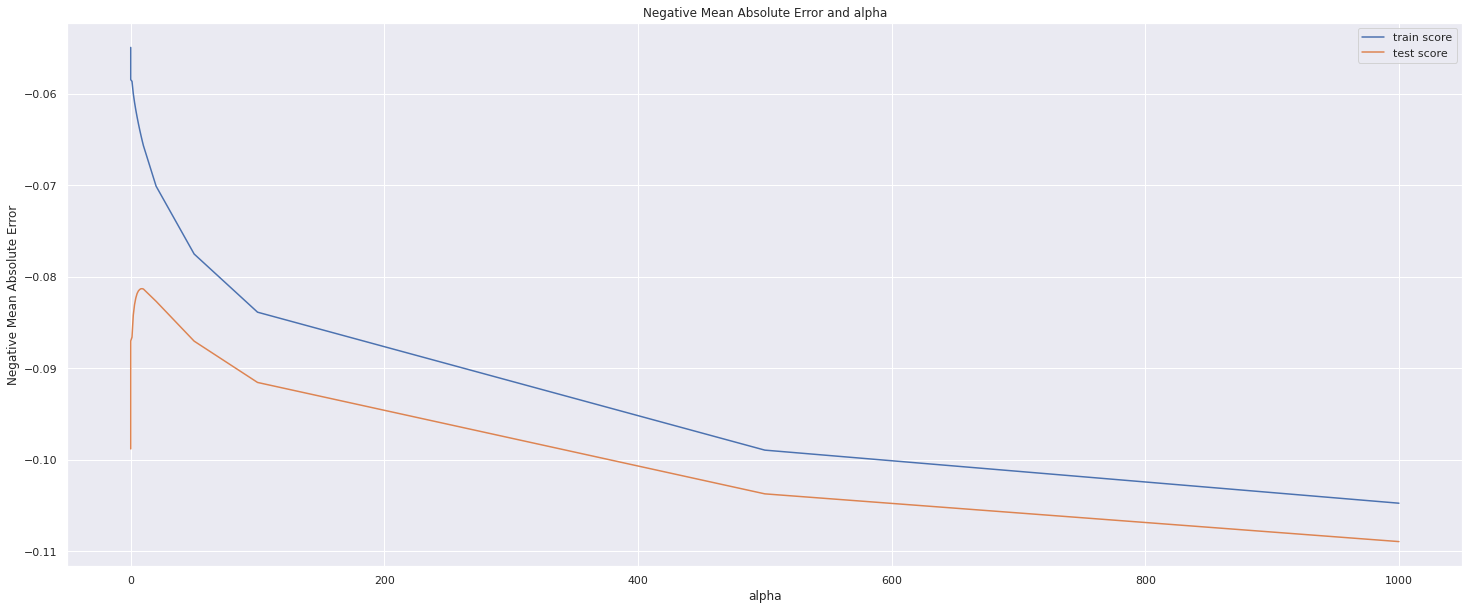

In [83]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.figure(figsize=(25,10))

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

### From the above graph and the best_param_ score we got optimum lambda to be 9

In [84]:
alpha = 9
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 3.62107933e-05,  7.14168435e-06,  2.21866608e-05,  5.98981303e-05,
        6.84071103e-05, -2.41186734e-05,  1.04186563e-04,  4.84248161e-02,
        1.18010541e-04,  1.11630398e-04, -5.29049473e-05,  1.76735995e-04,
        1.13952491e-04,  8.11411931e-05,  8.37169413e-05,  1.03013037e-04,
        1.63181644e-04,  2.17443135e-04,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -2.53156016e-03, -4.14084258e-02,  9.11085395e-03,
        1.39704214e-02, -4.54565048e-03, -1.48347609e-02,  3.25521476e-02,
       -1.14442418e-05, -6.43131495e-03, -6.71146304e-04, -1.26427914e-02,
        1.48719495e-02, -5.69368927e-02, -3.23034557e-03,  1.18943568e-02,
        5.77504397e-02,  2.52368574e-02,  4.65531867e-02,  1.94253410e-02,
       -1.26630078e-02,  6.28475573e-03,  1.02589847e-02, -5.55098795e-03,
        5.58786390e-03,  2.62575659e-02, -4.20373404e-02,  7.29502047e-03,
        2.51652776e-02, -2.59077378e-02, -5.88828590e-03, -2.01263098e-02,
        8.87397917e-03, -

In [85]:
#lets predict the R-squared value of test and train data
y_train_preds = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_preds))

0.9383037830512898


## Lasso

In [86]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [87]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.130748,0.056757,0.006695,0.000100,0.0001,{'alpha': 0.0001},-0.087322,-0.097168,-0.086642,-0.082303,...,-0.086404,0.006241,2,-0.057811,-0.057599,-0.058038,-0.059896,-0.061575,-0.058984,0.001532
1,0.030938,0.005397,0.006410,0.000092,0.001,{'alpha': 0.001},-0.090045,-0.081869,-0.085913,-0.082045,...,-0.082981,0.004975,1,-0.071561,-0.071717,-0.073923,-0.072659,-0.075816,-0.073135,0.001583
2,0.018088,0.004888,0.006498,0.000190,0.01,{'alpha': 0.01},-0.121403,-0.110077,-0.103994,-0.121998,...,-0.112228,0.008067,3,-0.105844,-0.107531,-0.109628,-0.106590,-0.110799,-0.108078,0.001861
3,0.059754,0.018752,0.006632,0.000085,0.05,{'alpha': 0.05},-0.126955,-0.115582,-0.113403,-0.130792,...,-0.119732,0.007651,4,-0.114441,-0.117004,-0.118097,-0.113422,-0.118413,-0.116275,0.001996
4,0.046972,0.025509,0.006559,0.000092,0.1,{'alpha': 0.1},-0.126691,-0.116179,-0.114227,-0.131159,...,-0.119972,0.007586,5,-0.114587,-0.117160,-0.118292,-0.113741,-0.118617,-0.116479,0.001969
5,0.043160,0.003214,0.006590,0.000049,0.2,{'alpha': 0.2},-0.126439,-0.117336,-0.114632,-0.131945,...,-0.120311,0.007706,6,-0.114849,-0.117510,-0.118587,-0.114603,-0.119135,-0.116937,0.001881
6,0.044319,0.008668,0.007212,0.001087,0.3,{'alpha': 0.3},-0.126302,-0.118633,-0.115181,-0.132910,...,-0.120775,0.007902,7,-0.115280,-0.117992,-0.119070,-0.115353,-0.119701,-0.117479,0.001849
7,0.036337,0.005505,0.006815,0.000292,0.4,{'alpha': 0.4},-0.125962,-0.120199,-0.115811,-0.133554,...,-0.121224,0.007972,8,-0.115733,-0.118678,-0.119834,-0.115867,-0.120550,-0.118133,0.001996
8,0.034835,0.008080,0.006625,0.000070,0.5,{'alpha': 0.5},-0.125890,-0.121162,-0.116720,-0.134189,...,-0.121702,0.008037,9,-0.116312,-0.119067,-0.120728,-0.116365,-0.121561,-0.118807,0.002169
9,0.033124,0.009238,0.006516,0.000035,0.6,{'alpha': 0.6},-0.125967,-0.122304,-0.117525,-0.134685,...,-0.122245,0.008039,10,-0.117006,-0.119554,-0.121442,-0.116866,-0.122503,-0.119474,0.002278


In [88]:
#lets find out the R-squared value of the lasso model
model_cv1 = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv1.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [89]:
# cv results
cv_results1 = pd.DataFrame(model_cv1.cv_results_)
cv_results1

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.139004,0.061448,0.006738,0.000067,0.0001,{'alpha': 0.0001},0.880934,0.857483,0.881326,0.899951,...,0.886165,0.018368,2,0.954435,0.955537,0.955361,0.951217,0.951265,0.953563,0.001933
1,0.033344,0.005769,0.007412,0.001486,0.001,{'alpha': 0.001},0.872605,0.912423,0.898236,0.894964,...,0.900313,0.017189,1,0.929742,0.926310,0.925894,0.925771,0.921636,0.925871,0.002574
2,0.014308,0.000441,0.006462,0.000093,0.01,{'alpha': 0.01},0.794985,0.840270,0.855786,0.796203,...,0.829232,0.028185,3,0.851733,0.839174,0.837232,0.845047,0.832944,0.841226,0.006538
3,0.063561,0.022450,0.006795,0.000107,0.05,{'alpha': 0.05},0.779644,0.819266,0.835234,0.767806,...,0.806479,0.027497,4,0.825667,0.812554,0.810562,0.825427,0.811050,0.817052,0.006967
4,0.043772,0.020214,0.006633,0.000068,0.1,{'alpha': 0.1},0.780169,0.817459,0.833887,0.766460,...,0.805988,0.027618,5,0.825345,0.812274,0.810307,0.825083,0.810742,0.816750,0.006942
5,0.042972,0.003217,0.006658,0.000043,0.2,{'alpha': 0.2},0.781167,0.813725,0.833822,0.762609,...,0.805153,0.028770,6,0.824375,0.811339,0.809498,0.823885,0.809659,0.815751,0.006873
6,0.041609,0.005517,0.008150,0.002596,0.3,{'alpha': 0.3},0.781956,0.809357,0.833447,0.760223,...,0.804175,0.029377,7,0.822976,0.809940,0.808173,0.822651,0.808263,0.814400,0.006899
7,0.035868,0.005276,0.006642,0.000101,0.4,{'alpha': 0.4},0.783164,0.804485,0.832566,0.759470,...,0.803250,0.029295,8,0.821574,0.808142,0.806318,0.821691,0.806310,0.812807,0.007237
8,0.034170,0.007361,0.006742,0.000118,0.5,{'alpha': 0.5},0.784113,0.801263,0.831209,0.758274,...,0.802261,0.029230,9,0.819771,0.807108,0.804441,0.820828,0.804102,0.811250,0.007469
9,0.032537,0.007961,0.007279,0.001269,0.6,{'alpha': 0.6},0.784827,0.797710,0.829763,0.757328,...,0.801054,0.029006,10,0.817727,0.805850,0.802925,0.819850,0.801954,0.809661,0.007592


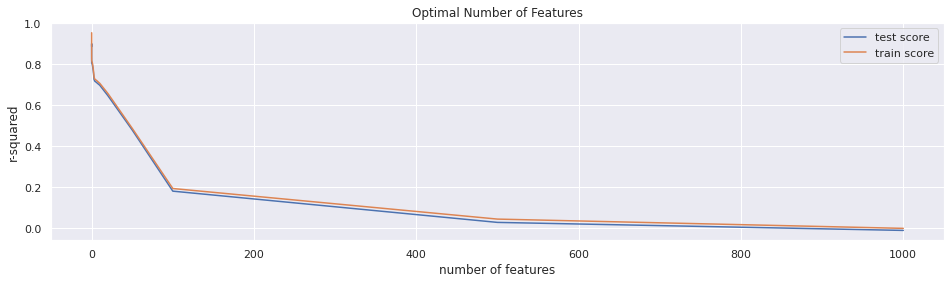

In [90]:
# plotting cv results
plt.figure(figsize=(16,4))

plt.plot(cv_results1["param_alpha"], cv_results1["mean_test_score"])
plt.plot(cv_results1["param_alpha"], cv_results1["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper right')

In [91]:
#checking the value of optimum number of parameters
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 0.001}
-0.08298114744718385


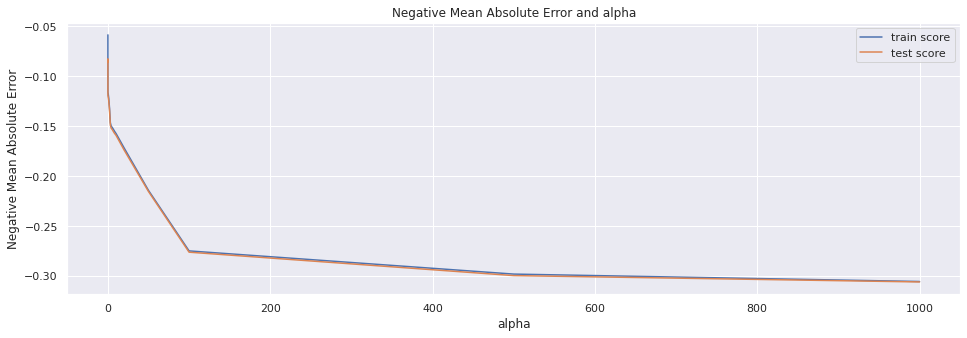

In [92]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.figure(figsize=(16,5))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

### From the above graph and the best_param_ score we got optimum lambda to be 0.001

In [93]:
alpha = 0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001)

In [94]:
#lets predict the R-squared value of test and train data
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))


0.9226502182669222


In [95]:
#lets predict the R-squared value of test and train data
y_test_pred = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))


0.9182466849566315


In [96]:
from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_test, y_test_pred))

RMSE is: 
 0.01176696251184183


In [97]:
lasso.coef_

array([ 3.97813027e-05,  7.36185730e-06,  1.66136615e-05,  1.50465431e-04,
        1.00007807e-04,  5.53799696e-05,  4.36414410e-05,  4.34271790e-02,
        2.72097721e-04,  2.48717550e-04,  6.79832311e-05,  4.35018421e-05,
        1.22365321e-04,  1.43146976e-04,  8.73482207e-05,  1.54782594e-04,
        2.07168145e-04,  2.39869308e-04,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -2.82252202e-03, -4.10765859e-02,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  2.49949089e-02,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -3.74223826e-03,
        0.00000000e+00, -3.33085077e-02, -0.00000000e+00,  0.00000000e+00,
        3.69923989e-02,  0.00000000e+00,  2.99202751e-02, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  8.09556663e-04, -1.24805428e-02, -0.00000000e+00,
        1.32830422e-02, -0.00000000e+00,  0.00000000e+00, -9.56287147e-03,
        0.00000000e+00, -

In [98]:
alpha = 0.001

lasso = Lasso(alpha=alpha)

lasso.fit(X_train,y_train)
preds = lasso.predict(X_test)
final_predictions = np.exp(preds)

In [99]:
#lets predict the R-squared value of test 

print(metrics.r2_score(y_true=y_test, y_pred=preds))

0.9182466849566315


Ridge with optimal lambda 

In [100]:
alpha = 9

ridge = Ridge(alpha=alpha)

ridge.fit(X_train,y_train)
preds1 = ridge.predict(X_test)
final_predictions1 = np.exp(preds1)

In [101]:
#lets predict the R-squared value of test 

print(metrics.r2_score(y_true=y_test, y_pred=preds1))

0.9218789335616129


In [102]:
#lets predict the R-squared value of test data of RFECV
y_test_preds_rfecv = rfe_cv.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_preds_rfecv))

0.9188119198298678


In [103]:
preds0 = lm.predict(X_test)
final_predictions0 = np.exp(preds0)

In [104]:
#lets predict the R-squared value of test 

print(metrics.r2_score(y_true=y_test, y_pred=preds0))

0.8848988123131399


In [105]:
betas = pd.DataFrame(index=[x for x in X_test.columns], 
                     columns = ['LR', 'Ridge', 'Lasso'])
betas['LR'] = lm.coef_ # LR Regression
betas['Ridge'] = ridge.coef_ # Ridge Regression
betas['Lasso'] = lasso.coef_ # Lasso Regression
betas

,LR,Ridge,Lasso
LotFrontage,0.000013,0.000036,0.000040
LotArea,0.000006,0.000007,0.000007
MasVnrArea,0.000002,0.000022,0.000017
BsmtFinSF1,0.000053,0.000060,0.000150
BsmtFinSF2,0.000058,0.000068,0.000100
...,...,...,...
SaleCondition_AdjLand,0.229966,0.043857,0.000000
SaleCondition_Alloca,0.046287,0.019064,0.000000
SaleCondition_Family,0.016448,-0.001168,-0.000000
SaleCondition_Normal,0.080586,0.068712,0.064210


In [106]:
betas[betas.Lasso != 0]['Lasso'].count()

98

In [107]:
R2 = pd.DataFrame(index=['R2 Train',], 
                     columns = ['LR', 'Ridge_RFECV','Ridge', 'Lasso'])
R2['LR'] = metrics.r2_score(y_true=y_train, y_pred=y_train_preds_lm) # LR Regression
R2['Ridge_RFECV'] = metrics.r2_score(y_train, y_pred_rfe_cv) # Ridge with RFECV
R2['Ridge'] = metrics.r2_score(y_true=y_train, y_pred=y_train_preds) # Ridge Regression
R2['Lasso'] = metrics.r2_score(y_true=y_train, y_pred=y_train_pred) # Lasso Regression
R2T = pd.DataFrame(index=['R2 Test',], 
                     columns = ['LR', 'Ridge', 'Lasso'])
R2T['LR'] = metrics.r2_score(y_true=y_test, y_pred=preds0) # LR Regression
R2T['Ridge_RFECV'] =metrics.r2_score(y_true=y_test, y_pred=y_test_preds_rfecv) # Ridge with RFECV
R2T['Ridge'] = metrics.r2_score(y_true=y_test, y_pred=preds1) # Ridge Regression
R2T['Lasso'] = metrics.r2_score(y_true=y_test, y_pred=preds) # Lasso Regression


pd.concat([R2,R2T])

,LR,Ridge_RFECV,Ridge,Lasso
R2 Train,0.952932,0.947738,0.938304,0.922650
R2 Test,0.884899,0.918812,0.921879,0.918247


### Distribution of errors on test data

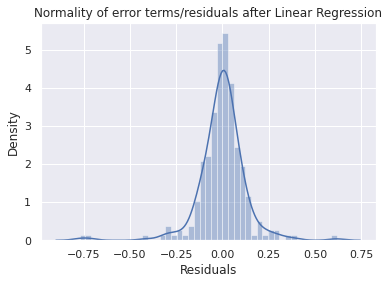

In [108]:
y_res=y_test-preds0
# Distribution of errors
sns.distplot(y_res,kde=True)
plt.title('Normality of error terms/residuals after Linear Regression')
plt.xlabel("Residuals")
plt.show()

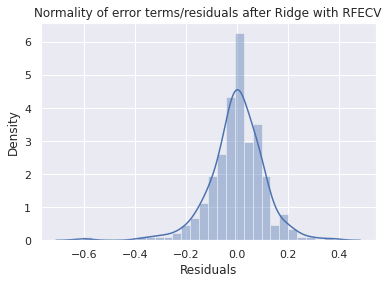

In [109]:
y_res=y_test-y_test_preds_rfecv
# Distribution of errors
sns.distplot(y_res,kde=True)
plt.title('Normality of error terms/residuals after Ridge with RFECV')
plt.xlabel("Residuals")
plt.show()

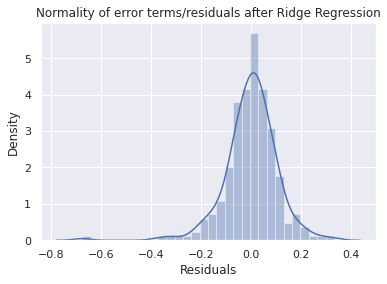

In [110]:
y_res=y_test-preds1
# Distribution of errors
sns.distplot(y_res,kde=True)
plt.title('Normality of error terms/residuals after Ridge Regression')
plt.xlabel("Residuals")
plt.show()

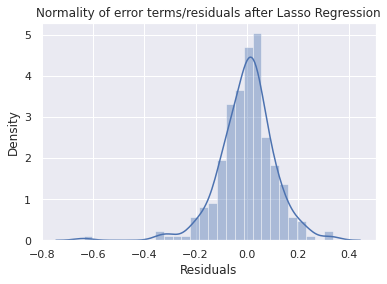

In [111]:
y_res=y_test-preds
# Distribution of errors
sns.distplot(y_res,kde=True)
plt.title('Normality of error terms/residuals after Lasso Regression')
plt.xlabel("Residuals")
plt.show()

In [112]:
## since there were few coefficients at 0, we removed them from features
# ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))
# Create a dataframe for Ridge Coefficients
mod_ridge = list(zip(cols, model_parameters))
pararidge = pd.DataFrame(mod_ridge)
pararidge.columns = ['Variable', 'Coeff']
res=pararidge.sort_values(by=['Coeff'], ascending = False)
res.head(20)

,Variable,Coeff
0,constant,10.877
60,GarageCond,0.098
37,CentralAir,0.058
8,LotConfig,0.048
39,1stFlrSF,0.047
58,GarageArea,0.039
70,MiscVal,0.039
28,BsmtExposure,0.033
46,HalfBath,0.026
49,KitchenQual,0.025


In [113]:
# Sorting the coefficients in ascending order
pararidge = pararidge.sort_values((['Coeff']), axis = 0, ascending = False)
pararidge

,Variable,Coeff
0,constant,10.877
60,GarageCond,0.098
37,CentralAir,0.058
8,LotConfig,0.048
39,1stFlrSF,0.047
...,...,...
65,3SsnPorch,-0.044
61,PavedDrive,-0.048
63,OpenPorchSF,-0.054
34,TotalBsmtSF,-0.057


In [114]:
## since there were few coefficients at 0, we removed them from features
# lasso model parameters
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))
# Create a dataframe for lasso Coefficients
mod_lasso = list(zip(cols, model_parameters))
paralasso = pd.DataFrame(mod_lasso)
paralasso.columns = ['Variable', 'Coeff']
res=paralasso.sort_values(by=['Coeff'], ascending = False)
res.head(20)

,Variable,Coeff
0,constant,10.810
60,GarageCond,0.111
8,LotConfig,0.043
70,MiscVal,0.037
37,CentralAir,0.037
39,1stFlrSF,0.030
28,BsmtExposure,0.025
49,KitchenQual,0.013
46,HalfBath,0.001
58,GarageArea,0.001


In [115]:
## since there were few coefficients at 0, we removed them from features
predlasso = pd.DataFrame(paralasso[(paralasso['Coeff'] != 0)])
predlasso

,Variable,Coeff
0,constant,10.810
8,LotConfig,0.043
22,MasVnrArea,-0.003
23,ExterQual,-0.041
28,BsmtExposure,0.025
32,BsmtFinSF2,-0.004
34,TotalBsmtSF,-0.033
37,CentralAir,0.037
39,1stFlrSF,0.030
46,HalfBath,0.001


In [116]:
### Assign the Features as x1, x2.....

predlasso.set_index(pd.Index(['C','x1', 'x2', 'x3', 'x4', 'x5' , 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16','x17','x18','x19']), inplace = True) 
predlasso

,Variable,Coeff
C,constant,10.810
x1,LotConfig,0.043
x2,MasVnrArea,-0.003
x3,ExterQual,-0.041
x4,BsmtExposure,0.025
x5,BsmtFinSF2,-0.004
x6,TotalBsmtSF,-0.033
x7,CentralAir,0.037
x8,1stFlrSF,0.030
x9,HalfBath,0.001


## **Observation**
- The model performance using Ridge Regression (for lambda 9) was better in terms of R2 values of Train and Test, it’s better to use Lasso, as it brings and assigns a zero value to insignificant features, enabling us to do feature selection with significant predictor variables.

- Below is the equation with Lasso for optimum Lambda as '0.001' :
SalesPrice = 10.81 + x1 * 0.043 + x2 * -0.003 + x3 * -0.041 + x4 * 0.025 + x5 * -0.004 + x6 * -0.033 + x7 * 0.037 + x8 * 0.03 + x9 * 0.001 + x10 * -0.012 + x11 * 0.013 + x12 * -0.01 + x13 * 0.001 + x14 * 0.111 + x15 * -0.021 + x16 * -0.027 + x17 * -0.056 + x18 * -0.013 + x19 * 0.037

- Top 10 features with Lasso (lambda 0.001) are OverallCond_9, Neighborhood_Crawfor, OverallQual_9, SaleCondition_Partial, Functional_Typ, OverallCond_8, SaleCondition_Normal, Neighborhood_StoneBr, OverallCond_7 and OverallQual_8.

- Top 10 features with Ridge (lambda 9) are OverallCond_9, Neighborhood_Crawfor, Functional_Typ, OverallCond_8, OverallQual_9, Neighborhood_StoneBr, SaleCondition_Normal, SaleCondition_Partial, OverallQual_8 and MSZoning_FV.










# Assignment - Part 2 Questionnaires

## Q1. What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

- **Ridge regression**: -optimal alpha is **9**
- **Lasso regression**: -optimal alpha is  **0.001**


In [117]:
#Q1
##Change the alpha value from 9 to 18 [double the initial alpha]
alpha = 18 

ridge2 = Ridge(alpha=alpha)

ridge2.fit(X_train,y_train)


Ridge(alpha=18)

In [118]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge2.predict(X_train)
y_pred_test = ridge2.predict(X_test)

metric2 = []
r2_train_lr = metrics.r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = metrics.r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = metrics.mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = metrics.mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

#Alpha 9

# R2 Train 93.8%
# R2 Test 92.2%

0.9317264720456169
0.9198286734264514
10.369626757208717
2.8963549850865244
0.010348928899409898
0.011539262888790935


### Rsquare of training  and testing data has decreased

In [119]:
#Changed alpha 0.001 to 0.002 [double the initial alpha]
alpha =0.002
lasso20 = Lasso(alpha=alpha)
lasso20.fit(X_train, y_train) 

Lasso(alpha=0.002)

In [120]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = lasso20.predict(X_train)
y_pred_test = lasso20.predict(X_test)

metric3 = []
r2_train_lr = metrics.r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = metrics.r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = metrics.mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = metrics.mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

#Alpha 0.001

# R2 Train 92.3%
# R2 Test 91.8%

0.9043512080759172
0.9085440122655303
14.527479416229339
3.30403670878186
0.014498482451326684
0.013163492863672748


### Rsquare of training and testing data has decreased

In [121]:
#important predictor variables
betas = pd.DataFrame(index=X_train.columns)
betas.rows = X_train.columns
betas['Ridge2'] = ridge2.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_
betas['Lasso20'] = lasso20.coef_
pd.set_option('display.max_rows', None)
betas.head(20)

,Ridge2,Ridge,Lasso,Lasso20
LotFrontage,0.000037,0.000036,0.000040,0.000030
LotArea,0.000007,0.000007,0.000007,0.000008
MasVnrArea,0.000032,0.000022,0.000017,0.000019
BsmtFinSF1,0.000067,0.000060,0.000150,0.000171
BsmtFinSF2,0.000063,0.000068,0.000100,0.000109
BsmtUnfSF,-0.000022,-0.000024,0.000055,0.000065
TotalBsmtSF,0.000108,0.000104,0.000044,0.000051
CentralAir,0.047394,0.048425,0.043427,0.051892
1stFlrSF,0.000126,0.000118,0.000272,0.000267
2ndFlrSF,0.000119,0.000112,0.000249,0.000267


## Top 10 features of ridge for alpha 18
The most important variable after the changes has been implemented for ridge regression are as
- Neighborhood_Crawfor
- Functional_Typ
- OverallCond_9
- OverallCond_8
- OverallQual_9
- SaleCondition_Normal
- Neighborhood_StoneBr
- OverallCond_7
- OverallQual_8
- SaleCondition_Partial

In [122]:
#top 10 Features after alpha 18 for Ridge 
(betas[['Ridge2']].sort_values(by=['Ridge2'], ascending = False)).head(10)

,Ridge2
Neighborhood_Crawfor,0.078860
Functional_Typ,0.077721
OverallCond_9,0.074737
OverallCond_8,0.071730
OverallQual_9,0.061549
SaleCondition_Normal,0.059855
Neighborhood_StoneBr,0.054949
OverallCond_7,0.052231
OverallQual_8,0.050335
SaleCondition_Partial,0.048681


## Top 10 features of lasso for alpha 0.002
The most important variable after the changes has been implemented for lasso regression are as 

- SaleCondition_Partial
- Neighborhood_Crawfor
- Functional_Typ
- OverallQual_9
- OverallCond_8
- CentralAir
- SaleCondition_Normal
- OverallCond_7
- GarageCond_TA
- OverallQual_8	

In [123]:
#top 10 Features after alpha 0.002 for lasso 
(betas[['Lasso20']].sort_values(by=['Lasso20'], ascending = False)).head(10)

,Lasso20
SaleCondition_Partial,0.083015
Neighborhood_Crawfor,0.082898
Functional_Typ,0.080223
OverallQual_9,0.060670
OverallCond_8,0.056270
CentralAir,0.051892
SaleCondition_Normal,0.049381
OverallCond_7,0.049005
GarageCond_TA,0.048400
OverallQual_8,0.038010


## Top 10 features of lasso for alpha 0.001

In [124]:
(betas[['Lasso']].sort_values(by=['Lasso'], ascending = False)).head(10)

,Lasso
OverallCond_9,0.114314
Neighborhood_Crawfor,0.110850
OverallQual_9,0.108165
SaleCondition_Partial,0.103962
Functional_Typ,0.085734
OverallCond_8,0.077962
SaleCondition_Normal,0.064210
Neighborhood_StoneBr,0.061873
OverallCond_7,0.056507
OverallQual_8,0.054637


## Top 10 features of ridge for alpha 9

In [125]:
(betas[['Ridge']].sort_values(by=['Ridge'], ascending = False)).head(10)

,Ridge
OverallCond_9,0.103396
Neighborhood_Crawfor,0.098124
Functional_Typ,0.087704
OverallCond_8,0.083031
OverallQual_9,0.080163
Neighborhood_StoneBr,0.078575
SaleCondition_Normal,0.068712
SaleCondition_Partial,0.061341
OverallQual_8,0.058988
MSZoning_FV,0.057750


## Q2. You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?

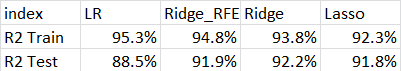


Based on the Rsquare value on training data we can say that the Ridge is better.
Where as if we compare the variation in R2 for training and test Lasso performs better, I will choose **Lasso regression** as would be a better option it helps in feature elimination and the model will be robust.

## Q3. After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [126]:
# Droping top 5 predictor
X_train1 = X_train.drop(['OverallCond_9','Neighborhood_Crawfor','OverallQual_9','SaleCondition_Partial','Functional_Typ'],axis=1)
X_test1 = X_test.drop(['OverallCond_9','Neighborhood_Crawfor','OverallQual_9','SaleCondition_Partial','Functional_Typ'],axis=1)

In [127]:
alpha =0.001
lasso2 = Lasso(alpha=alpha)
lasso2.fit(X_train1, y_train) 

Lasso(alpha=0.001)

In [128]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = lasso2.predict(X_train1)
y_pred_test = lasso2.predict(X_test1)

metric3 = []
r2_train_lr = metrics.r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = metrics.r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = metrics.mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = metrics.mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)
#Alpha 0.001

# R2 Train 92.3%
# R2 Test 91.8%

0.914050745999649
0.9134752989892844
13.054279026560103
3.125883776858834
0.013028222581397308
0.01245372022652922


### Rsquare of training and testing data has decreased

In [129]:
#important predictor variables
betas = pd.DataFrame(index=X_train1.columns)
betas.rows = X_train1.columns
betas['Lasso2'] = lasso2.coef_
pd.set_option('display.max_rows', None)
(betas[['Lasso2']].sort_values(by=['Lasso2'], ascending = False)).head(10)

,Lasso2
SaleType_New,0.086907
OverallCond_8,0.066005
Neighborhood_StoneBr,0.064343
SaleCondition_Normal,0.055949
GarageCond_TA,0.051816
CentralAir,0.049147
Condition1_Norm,0.048650
OverallCond_7,0.045727
MSZoning_FV,0.044892
MSSubClass_70,0.044450


#### Five most important predictor variables

- SaleType_New
- OverallCond_8
- Neighborhood_StoneBr
- SaleCondition_Normal
- GarageCond_TA


## Q4. How can you make sure that a model is robust and generalisable? What are the implications of the same for the accuracy of the model and why?

The model needs to be robust and generalizable so that outliers in the training data do not impact. The model also has to be generalisable so that the test accuracy and training score are in expectable margin. The model needs to be accurate for datasets other than the ones which were used for training with is the test. 

Outlier analysis needs to be done and only those which are relevant to the dataset need to be kept, as the outlier may affect the accuracy.As the model needs to be robust for predictive analysis.
